In [4]:
from transformers import BertTokenizerFast
import pandas as pd
from nltk.corpus import words
import nltk
from transformers import BertTokenizer
from nltk.corpus import words, wordnet
import ast

In [5]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Nico
[nltk_data]     Rig\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [6]:
# Load English words from NLTK
nltk_words = set(words.words())

# Extract additional words from WordNet
wordnet_words = set(lemma.name().replace('_', ' ') for synset in wordnet.all_synsets() for lemma in synset.lemmas())

# Combine both word sets
english_vocab = nltk_words.union(wordnet_words)

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", do_lower_case=True)

# Identify missing words
missing_words = [word for word in english_vocab if tokenizer.tokenize(word) == ['[UNK]']]

print(f"Total Missing Words: {len(missing_words)}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

d:\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nico Rig\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Total Missing Words: 0


In [7]:
df = pd.read_csv("subsetOfDataSoftware.csv")

In [8]:
def combine_subwords(tokens):
    """
    Combines subword tokens marked with '##' into complete words.
    
    Args:
    tokens (list): List of tokenized words from a tokenizer.

    Returns:
    list: List of cleaned words without subword fragmentation.
    """
    combined_tokens = []
    current_word = ""

    for token in tokens:
        if token.startswith("##"):
            # Append to the previous word (removing the '##')
            current_word += token[2:]
        else:
            # Add the previous complete word to the list if it exists
            if current_word:
                combined_tokens.append(current_word)
            # Start a new word
            current_word = token
        
    # Append the last word
    if current_word:
        combined_tokens.append(current_word)

    return combined_tokens

In [9]:
tokenized_text = {
    "id": [],
    "sentence": [],
    "length": []
}

In [10]:
id = 0
for d in df['description'].values:
    combined_txt = combine_subwords(tokenizer.tokenize(d))
    tokenized_text['id'].append(id)
    tokenized_text['sentence'].append(combined_txt)
    tokenized_text['length'].append(len((combined_txt)))
    id+=1

Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors


In [11]:
df_dict = pd.DataFrame(tokenized_text)

In [12]:
df_dict

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, softwa...",30
1,1,"[job, description, :, goyt, is, seeking, a, sk...",295
2,2,"[are, you, driven, by, the, thrill, of, solvin...",234
3,3,"[request, :, data, architectlocation, :, san, ...",73
4,4,"[this, opportunity, is, joining, an, innovatio...",252
...,...,...,...
4621,4621,"[we, ’, re, looking, for, people, who, put, th...",735
4622,4622,"[role, title, :, data, engineering, lead, for,...",613
4623,4623,"[overview, the, credit, risk, &, decision, sci...",913
4624,4624,"[date, posted, :, 04, /, 19, /, 2024hiring, or...",570


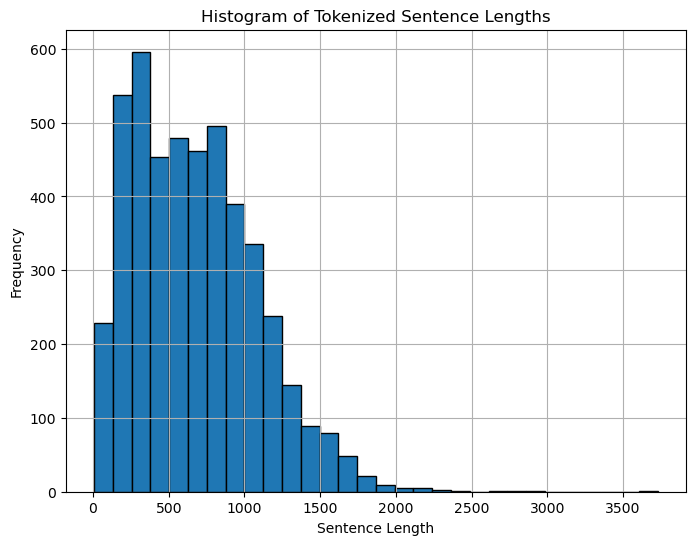

In [13]:
import matplotlib.pyplot as plt
lengths = df_dict['length']
plt.figure(figsize=(8, 6));
plt.hist(lengths, bins=30, edgecolor='black');
plt.title('Histogram of Tokenized Sentence Lengths');
plt.xlabel('Sentence Length');
plt.ylabel('Frequency');
plt.grid(True);
plt.show();

In [14]:
subset=df_dict[df_dict['length'] < 900]

In [15]:
subset

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, softwa...",30
1,1,"[job, description, :, goyt, is, seeking, a, sk...",295
2,2,"[are, you, driven, by, the, thrill, of, solvin...",234
3,3,"[request, :, data, architectlocation, :, san, ...",73
4,4,"[this, opportunity, is, joining, an, innovatio...",252
...,...,...,...
4619,4619,"[about, this, featured, opportunity, we, are, ...",559
4620,4620,"[exciting, long, -, term, and, fully, remote, ...",179
4621,4621,"[we, ’, re, looking, for, people, who, put, th...",735
4622,4622,"[role, title, :, data, engineering, lead, for,...",613


In [16]:
max_length_row = subset[subset['length'] == subset['length'].max()]

In [17]:
max_length_row.iloc[0][0]

C:\Users\Nico Rig\AppData\Local\Temp\ipykernel_24812\4267716270.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_length_row.iloc[0][0]


543

In [18]:
subset[subset['length'] <= 200]

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, softwa...",30
3,3,"[request, :, data, architectlocation, :, san, ...",73
5,5,"[the, enterprise, data, infrastructure, and, a...",72
8,8,"[data, engineer, with, kafka, (, w2, only, ), ...",165
9,9,"[company, descriptionpb, built, is, a, residen...",176
...,...,...,...
4508,4508,"[job, title, :, datebase, adminjob, location, ...",191
4537,4537,"[company, descriptionstarpro, -, better, data,...",184
4575,4575,"[job, title, :, embedded, software, engineer, ...",125
4618,4618,"[senior, embedded, developer, -, bs, degree, i...",71


In [19]:
subset[subset['id'] == 9].iloc[0][1]

C:\Users\Nico Rig\AppData\Local\Temp\ipykernel_24812\4044800302.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset[subset['id'] == 9].iloc[0][1]


['company',
 'descriptionpb',
 'built',
 'is',
 'a',
 'residential',
 'construction',
 'and',
 'developement',
 'company',
 'based',
 'in',
 'jupiter',
 ',',
 'fl',
 '.',
 'with',
 'over',
 '40',
 'years',
 'of',
 'experience',
 ',',
 'pb',
 'built',
 'has',
 'built',
 'over',
 '1',
 'million',
 'square',
 'feet',
 'of',
 'commercial',
 '/',
 'retail',
 'space',
 'and',
 'over',
 '$',
 '200',
 'million',
 'in',
 'residential',
 'custom',
 'luxury',
 'homes',
 '.',
 'they',
 'are',
 'known',
 'for',
 'constructing',
 'unique',
 'and',
 'distinctive',
 'homes',
 'using',
 'exquisite',
 'materials',
 'in',
 'some',
 'of',
 'florida',
 "'",
 's',
 'finest',
 'communities',
 '.',
 'role',
 'descriptionthis',
 'is',
 'a',
 'full',
 '-',
 'time',
 'on',
 '-',
 'site',
 'role',
 'for',
 'a',
 'receptionist',
 '/',
 'data',
 'entry',
 'position',
 'at',
 'pb',
 'built',
 'in',
 'jupiter',
 ',',
 'fl',
 '.',
 'as',
 'a',
 'receptionist',
 '/',
 'data',
 'entry',
 ',',
 'you',
 'will',
 'be',
 'r

In [25]:
import os
from langchain_mistralai import ChatMistralAI
from langchain_core.prompts import PromptTemplate

def set_api_key_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            api_key = file.read().strip()
            print(api_key)
            os.environ["MISTRAL_API_KEY"] = api_key
            print("Mistral API Key set successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File '{file_path}' not found.")
    except Exception as e:
        raise Exception(f"An error occurred: {e}")

# Set API key using the file
api_key_path = "mistral_key.txt"
set_api_key_from_file(api_key_path)

# Initialize MistralAI with LangChain
llm = ChatMistralAI(model_name="mistral-large-latest", temperature=0.7)

# Read the prompt template from the file
with open("prompt.txt") as f:
    template = f.read()

# Define the prompt using LangChain
prompt_template = PromptTemplate.from_template(template)


gtLWnZWKyHGeQr69A4Gi5v7CoNjpxukp
Mistral API Key set successfully.


In [39]:
import os
import requests
import json

def set_api_key_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            api_key = file.read().strip()
            os.environ["MISTRAL_API_KEY"] = api_key
            print("Mistral API Key set successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File '{file_path}' not found.")
    except Exception as e:
        raise Exception(f"An error occurred: {e}")

# Set API key
api_key_path = "mistral_key.txt"
set_api_key_from_file(api_key_path)

# Load prompt template from file
with open("prompt.txt", "r") as f:
    template = f.read()

# Direct call to Mistral API
def get_mistral_response(user_input, model="mistral-large-latest", temperature=0.7):
    api_key = os.environ["MISTRAL_API_KEY"]
    url = "https://api.mistral.ai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }

    # Format the prompt
    prompt = template.format(job_description=user_input)

    payload = {
        "model": model,
        "temperature": temperature,
        "messages": [
            {"role": "user", "content": prompt}
        ]
    }

    response = requests.post(url, headers=headers, data=json.dumps(payload))

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        raise Exception(f"Error: {response.status_code} - {response.text}")


Mistral API Key set successfully.


In [40]:
from tqdm import tqdm
import pandas as pd

# Take the first 25 rows of the DataFrame
subset100_ = subset[1200:1300].copy()  # .copy() avoids SettingWithCopyWarning

result = []

# Loop with progress bar
for job_description in tqdm(subset100_['sentence'], desc="Processing job descriptions"):
    try:
        response = get_mistral_response(job_description)  # from the earlier function
        result.append(response)
    except Exception as e:
        print(f"❌ Error: {e}")
        result.append("ERROR")

# Assign results to a new column
subset100_['result'] = result


Processing job descriptions:  40%|████      | 40/100 [57:13<56:47, 56.78s/it]   

❌ Error: Error: 502 - <html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>cloudflare</center>
</body>
</html>



Processing job descriptions: 100%|██████████| 100/100 [2:15:22<00:00, 81.23s/it]  


In [41]:
subset100_['result']=result
subset100_.to_csv('subset_1200_to_1300_.csv')

In [42]:
from tqdm import tqdm
import pandas as pd

# Take the first 25 rows of the DataFrame
subset100_ = subset[1300:1500].copy()  # .copy() avoids SettingWithCopyWarning

result = []

# Loop with progress bar
for job_description in tqdm(subset100_['sentence'], desc="Processing job descriptions"):
    try:
        response = get_mistral_response(job_description)  # from the earlier function
        result.append(response)
    except Exception as e:
        print(f"❌ Error: {e}")
        result.append("ERROR")

# Assign results to a new column
subset100_['result'] = result


Processing job descriptions: 100%|██████████| 200/200 [4:44:37<00:00, 85.39s/it]   


In [43]:
subset100_['result']=result
subset100_.to_csv('subset_1300_to_1500_.csv')

In [44]:
from tqdm import tqdm
import pandas as pd

# Take the first 25 rows of the DataFrame
subset100_ = subset[1500:1600].copy()  # .copy() avoids SettingWithCopyWarning

result = []

# Loop with progress bar
for job_description in tqdm(subset100_['sentence'], desc="Processing job descriptions"):
    try:
        response = get_mistral_response(job_description)  # from the earlier function
        result.append(response)
    except Exception as e:
        print(f"❌ Error: {e}")
        result.append("ERROR")

# Assign results to a new column
subset100_['result'] = result


Processing job descriptions:  29%|██▉       | 29/100 [34:59<53:01, 44.81s/it]   

❌ Error: Error: 502 - <html>
<head><title>502 Bad Gateway</title></head>
<body>
<center><h1>502 Bad Gateway</h1></center>
<hr><center>cloudflare</center>
</body>
</html>



Processing job descriptions: 100%|██████████| 100/100 [2:07:45<00:00, 76.65s/it]  


In [45]:
subset100_['result']=result
subset100_.to_csv('subset_1500_to_1600_.csv')